## The Maximum Independent Set


Let's do an end-to-end example, using Bloqade to solve a paradigmatic problem of graph theory: the Maximum Independent Set (MIS). Given a graph with nodes (say we color them in white) and some edges between them, to find an MIS is to color the largest possible subset of nodes (say in red) not connected among themselves by edges. Our MIS should simply be a set of red nodes with no edges between them. How do we solve these with atoms?

As usual, let's just start prepping the grounds

In [ ]:
using Bloqade
using Random
Random.seed!(42)
using PythonCall
plt = pyimport("matplotlib.pyplot");

In [ ]:
Random.seed!(2)
a=4.5
atoms = generate_sites(SquareLattice(), 4,4; scale = a) |> random_dropout(0.2)
Rb=sqrt(2*sqrt(2))*a
Bloqade.plot(atoms, blockade_radius = Rb)

In [ ]:
#Total evolution time
T_max = 0.6

#Fix Δ according to the desired Rydberg radius
C6 = 2π * 862690;
Ω_max = 2π*2.5
Δ_max = C6 / Rb^6

#Build time traces for adiabatic algorithm
Ω = piecewise_linear(clocks = [0.0, 0.1, 0.5, T_max], values = [0.0, Ω_max, Ω_max, 0])
Δ_start = -Δ_max
Δ_end = Δ_max
Δ = piecewise_linear(clocks = [0.0, 0.1, 0.5, T_max], values = [Δ_start, Δ_start, Δ_end, Δ_end])

#Quick plot to check
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 4))
Bloqade.plot!(ax1, Ω)
ax1.set_ylabel("Ω/2π (MHz)")
Bloqade.plot!(ax2, Δ)
ax2.set_ylabel("Δ/2π (MHz)")
fig

Optimizing these time traces can improve the convergence and likelihood of finding the MIS, but this will do for now. 

We initialize the problem with the parameters above, including a "zero_state" initial register for the Hamiltonian's qubits.

In [ ]:
h_kings = rydberg_h(atoms; Ω = Ω, Δ = Δ)
prob = SchrodingerProblem(zero_state(nqubits(h_kings)), T_max, h_kings);
emulate!(prob)

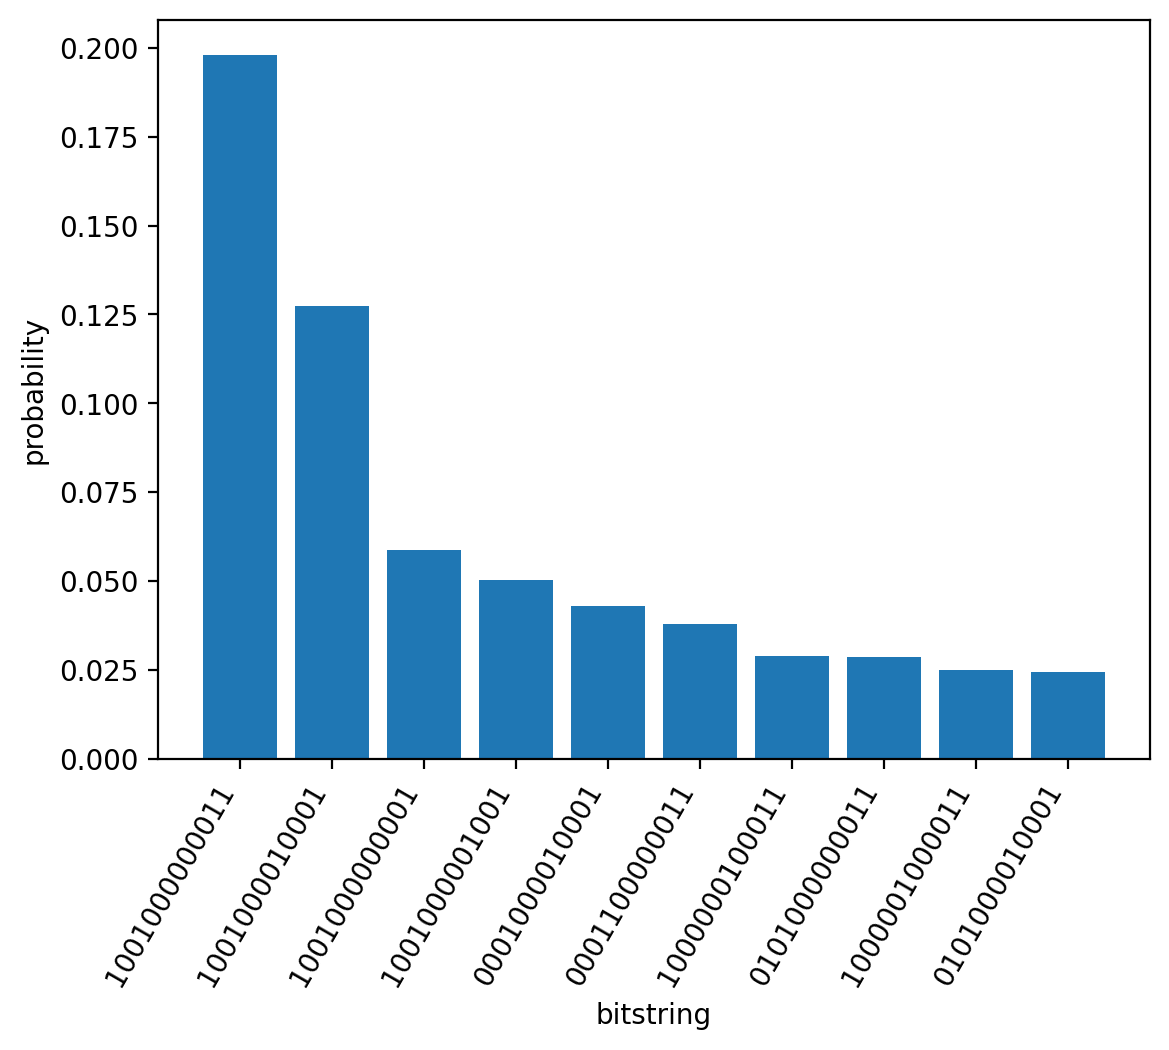

In [39]:
bitstring_hist(prob.reg; nlargest = 10)

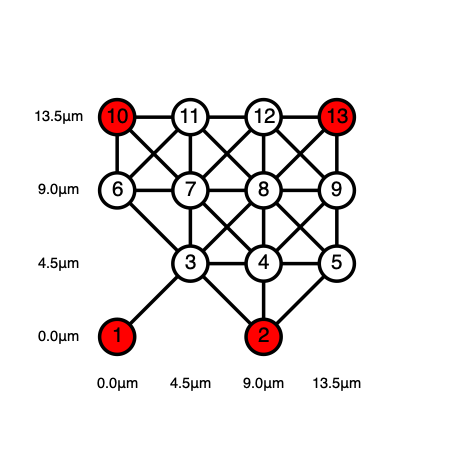

In [40]:
best_bit_strings = most_probable(prob.reg, 3)

Bloqade.plot(atoms, blockade_radius = 7.5; colors = [iszero(b) ? "white" : "red" for b in best_bit_strings[1]])